                            Florestas Aleatórias

Para entender uma floresta aleatória. pense no seguinte: uma árvore de
decisão única é como um único especialista tomando uma decisão. Esse
especialista pode ser muito bom, mas também pode cometer erros ou ser
influenciado demais por um único ponto de dados.

O que é uma floresta aleatória? É um algoritmo de aprendizado de
máquina por conjunto (ensemble) que constrói um grande número de 
árvores de decisão (arvores = floresta). Em vez de confiar em uma
única arvore, ela combina as previsões de todas as árvores para
chegar a uma conclusão mais robusta e precisa.

                            Como funciona?

O "aleatório" no nome é a parte mais importante. Ele vem de duas 
fontes principais de aleatoidade:

1. Aleatoridade nos Dados (Bagging): 

A floresta não treina todas as árvores com o conjunto de dados completo.

Para cada árvore individual, ela seleciona uma amostra aleatória do seu conjunto de dados originais (com repetição). Isso significa que
cada árvore "vê" um subconjunto de dados ligeiramente diferente.

2. Aleatoridade nas caracteristicas (features):

 Quando uma árvore está sendo construida (em cada nó de decisão), ela não considera todas as caracteristicas para encontrar a melhor divisão.

 Em vez disso, ela considera apenas um subconjunto aleatório de caracteristicas. Isso garante que as árvores não se tornem muito 
 parecidas entre. Por exemplo, se a "experiência" for a caracteristica
 mais importante, todas as árvores fariam a primeira divisão com base
 nela. A aleatoridade evita isso e as força a aprender com outras
caracteristicas também.

                          Como a floresta faz uma previsão?
Para Classificação: Cada árvore na floresta faz sua previsão. A previsão final é determinada pelo voto da maioria das árvores. Se 90 das 100 árvores preveem a classe "Sim", a previsão final é "Sim".

Para Regressão: Cada árvore faz sua previsão de um valor numérico. A previsão final é a média de todas as previsões das árvores.


Criando a floresta aleatória

In [60]:
# Função que irá criar construir a floresta aleatória. A função recebe
# como argumento 
# x: Dados de caracteristicas
# y: Variável alvo da alocação do novo dado
# numero de arvores: Ira definir a quantidade de arvores que serão
# geradas na floresta.
def computarFlorestaAleatoria(x, y, numero_de_arvores):
    
    # Import da classe RandomForestRegressor que tem como objetivo
    # criar florestas aleatórias que alocam dados usando regressões 
    from sklearn.ensemble import RandomForestRegressor
    
    # Instância (criação do objeto) da classe RandomForestRegressor.
    # A classe como argumento em seu construtor o atributo n_estimators
    # que irá conter a quantidade de arvores da floresta.
    regressor = RandomForestRegressor(n_estimators=numero_de_arvores)
    
    # Treinando o modelo dafloresta usando os dados de x
    # e y
    regressor.fit(x, y)
    
    # Retorno do modelo treinado
    return regressor

Criando o gráfico que mostra a previsão da floresta aleatória

In [61]:
# Import da bilioteca que permite construir e manipular
# gráficos.
import matplotlib.pyplot as plt

# Função que irá construir o gráfico que mostra o comportamento da
# floresta aleatória. A função ira receber como argumento:
# xpoints: Pontos reais de x que representam as caracteristicas
# dos dados.
# ypoints: Pontos reais de y que representam as médias dos valores
# de cada arvore de decisão (será uma média das médias, ou seja,
# iremos juntar todas as médias para criar uma média geral).
# xline: Ira representar os valores de x que a reta deve passar
# yline: Irá representar os valores de y que a reta deve passar
def showPlot(xpoints, ypoints, xline, yline):
    
    # Função que irá criar os pontos do gráfico. A função recebe como
    # argumento os valores de xpoints e ypoints. O color irá definir
    # a cor dos pontos no gráfico
    plt.scatter(xpoints, ypoints, color='red')
    
    # Ira construir a linha do gráfico usando os valores de xline e yline.
    # O color irá definir a linha do gráfico
    plt.plot(xline, yline, color='blue')
    
    # Ira definir o titulo do gráfico       
    plt.title("Comparando pontos reais com a reta produzida pela regressão de florestas aleatórias ")
    
    # Ira definir o rótulo do eixo x
    plt.xlabel("Experiência em anos")
    
    # Irá definir o rótulo do eixo y
    plt.ylabel("Salário")
    
    # Irá exibir o gráfico 
    plt.show()


Função que irá aplicar a floresta aleatória nos dados

In [62]:
# Biblioteca que possui funções que manipulam o tempo
import time

# Possibilita manipular arrays e realizar cálculos matemáticos
import numpy as np

# Import do nosso arquivo de funções
from minhasfuncoes import funcoes 

# Função que irá aplicar o modelo de floresta nos dados do dataset.
# A função irá receber como argumento:
# nome_do_arquivo: Caminho da pasta que possui a base de dados.
# delimitador: valor que separa os dados no arquivo. O argumento
# terá como valor padrão a ',' (delimitador padrão dos arquivos csv).
def florestaAleatoria(nome_do_arquivo, delimitador=','):
    
    # Ira pegar o segundo atual (inicio da execução do código)
    tempo_inicial = time.time()

     # Carregando o dataset: Como no nosso arquivo de funções nós
     # dividimos os valores em x e y (transformamos eles em um array
     # numpy usando a função values do pandas). A função carregar_dataset
     # irá receber como como argumento o nome do arquivo eo seu delimitador
    x, y = funcoes.carregar_Dataset(nome_do_arquivo, delimitador)
    
    # Ira calcular o tempo necessário para carregamento do dataset
    tempo_necessário = time.time() - tempo_inicial
    
    # Impressão do tempo necessário para o carregamento dos dados.
    print("Tempo necessário para a execução do carregamento dos dados: ",
          round(tempo_necessário, 3), " segundos")
    
    # Irá pegar o segundo inicial (inicio da construção
    # da floresta).
    tempo_inicial = time.time()
    
    # Chamada da função que irá treinar a floresta aleatória.
    # A função ira receber como argumento o x, o y e o 100
    # que será a quantidade de arvores construidas na floresta
    floresta = computarFlorestaAleatoria(x, y, 100)
    
    # np.arange: É uma função do NumPY que cria uma sequência de números.
    # Devemos pensar nela como uma ferramenta para construir uma "régua
    # numérica".
    
    # min e max: Irão conter os valores minimos e máximos de x (valores que irao compor a sequência que será na ordem crescente). 
    
    #0.01: Este passo diz para a função criar números com um espaçamento
    # de 0.01 entre eles. Isso significa que, se a sua experiência vai
    # de 0 a 10 anos, essa linha de código irá gerar milhares de pontos,
    # como 0.00, 0.01, 0.02, 0.03... até 10.0 
    
    # O objetivo desse trecho é permitir a visualização dos dados
    # da floresta de forma mais clara e abrangente
    xgrid = np.arange(min(x), max(x), 0.01)
    
    # reshape: Método do NumPy que muda a forma de um array. Devemos
    # pensar em "reshape" como a ação de pegar uma fita de números e
    # transforma-la em uma coluna de números.
    
    # len(xgrid): Irá retornar o tamanho do array xgrid (total de valores 
    # que o xgrid possui).
    
    # 1: Indica que queremos criar um array de apenas uma coluna
    xgrid = xgrid.reshape((len(xgrid), 1))
    
    # Ira construir o gráfico que mostra o comportamento da floresta. A 
    # função irá receber como argumento:
    # x: Dados reais de x que serão os pontos.
    # y: Dados reais de y que serão as médias de cada arvore de decisão
    # (também serão representados por pontos)
    # xgrid: Valores de x em sequência que serão percorridos pela linha
    # do gráfico.
    # floresta.predict(xgrid): Valores previstos que serão percorridos pela
    # linha de predição da floresta
    showPlot(x, y, xgrid, floresta.predict(xgrid))
    
    # Irá calcular o tempo necessário para construção do gráfico
    tempo_necessário = time.time() - tempo_inicial
    
    # Impressão do tempo necessário para construção do gráfico
    print("Tempo necessário para construção do gráfico de floresta aleatória: ", round(tempo_necessário, 2), " segundos")
    
    # Ira pegar o segundo atual (inicio da renderização da imagem
    # da árvore escolhida)
    tempo_inicial = time.time()
    
    # # Import da função export_graphviz da biblioteca sklearn.tree
    # que tem como objetivo converter o objeto da sua árvore em 
    # um formato que pode ser desenhado.
    from sklearn.tree import export_graphviz
    
    # Import da biblioteca que irá pegar o formato de texto da sua
    # árvore e transforma-lo em uma imagem.
    import graphviz
    
    # Vraiável que irá conter o indice da arvore escolhida.
    indice_arvore = floresta[0]
    
    # Função que irá exportar a imagem da arvore. Ela recebe como 
    # argumento:
    # indice_arvore: Variável que contém a árvore escolhida
    # out_file = None: O out_file tem como objetivo salvar o arquivo
    # com os dados da arvore no nosso computador, como não queremos salvar os
    # dados, vamos passar o parametro None.
    # Features_names: Nome que queremos dar as caracteristicas análisadas
    # pela árvore
    dados_arvore = export_graphviz(indice_arvore, out_file=None, feature_names=['Experiência'])
    
    # Irá carregar os dados que serão utilizados para gerar a imagem.
    source = graphviz.Source(dados_arvore)
    
    # Função do grphviz que irá renderizar a imagem. A função irá receber
    # como argumento:
    # filename: Nome do arquivo/imagem que será gerada
    # format: Formato do arquivo/imagem que será gerada
    # view: Ira receber um valor booleano que permite a imagem ser
    # mostrada/ocultada após a execução do código
    source.render(filename='Arvore_da_floresta', format='png', view=True)
    
    # Irá calcular o tempo necessário para a renderização da imagem.
    tempo_necessário = time.time() - tempo_inicial
    
    # Impressão do tempo necessário para a renderização da imagem
    print("Tempo necessário para renderizar a imagem da floresta escolhida: ", round(tempo_necessário, 2), " segundos") 
    
    
    

Tempo necessário para a execução do carregamento dos dados:  0.048  segundos


C:\Users\caike\AppData\Local\Temp\ipykernel_15632\3723601766.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xgrid = np.arange(min(x), max(x), 0.01)


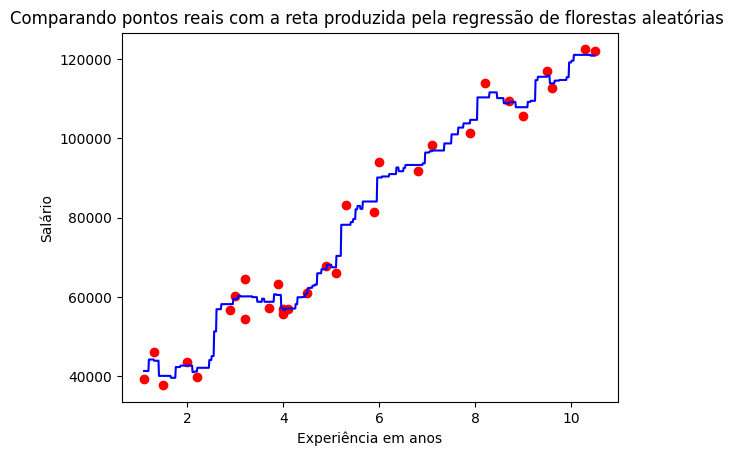

Tempo necessário para construção do gráfico de floresta aleatória:  0.32  segundos
Tempo necessário para renderizar a imagem da floresta escolhida:  2.08  segundos


In [63]:
florestaAleatoria('Dados/salary.csv', ';')

                            Conclusão do gráfico

-> Podemos observar que a linha azul possui os valores das médias gerais
geradas pelas árvores.

-> Podemos observar que há alguns outliers (valores fora do padrão) que 
não foram acessados pela reta de predição da floresta

-> Os pontos representam os valores reais da base de dados.

-> Podemos observar que em sua grande maioria os valores médios (repre
sentados pela linha) estão próximos dos valores reais (pontos vermelhos).